In [1]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

In [2]:
# Creating a DF out of the entire csv
jb_births_df = pd.read_csv("resources/2021_Data.csv")
jb_births_df.head()

,dob_yy,dob_mm,dob_tt,bfacil,f_facility,bfacil3,mage_impflg,mage_repflg,mager,mager14,...,ca_downs,ca_disor,ca_hypo,f_ca_limb,f_ca_cleftlp,f_ca_cleft,f_ca_downs,f_ca_chrom,f_ca_hypos,no_congen
0,2021,1,636,1,1,1,NaN,NaN,22,8,...,N,N,N,1,1,1,1,1,1,1
1,2021,1,259,1,1,1,NaN,NaN,31,10,...,N,N,N,1,1,1,1,1,1,1
2,2021,1,223,1,1,1,NaN,NaN,29,9,...,N,N,N,1,1,1,1,1,1,1
3,2021,1,241,1,1,1,NaN,NaN,39,11,...,N,N,N,1,1,1,1,1,1,1
4,2021,1,503,1,1,1,NaN,NaN,20,8,...,N,N,N,1,1,1,1,1,1,1


# Data Cleaning: 

In [3]:
# Choosing columns I want to examine more
jb_clean_births_df = jb_births_df[["dob_yy", "dob_mm","bfacil", "mager", "rf_inftr", "rf_fedrg", "rf_artec", "precare", "previs", "ab_nicu", "pay", "dbwt"]]
jb_clean_births_df.head()

,dob_yy,dob_mm,bfacil,mager,rf_inftr,rf_fedrg,rf_artec,precare,previs,ab_nicu,pay,dbwt
0,2021,1,1,22,N,X,X,3,99,N,5,3670
1,2021,1,1,31,N,X,X,99,99,N,6,3210
2,2021,1,1,29,N,X,X,3,8,N,2,3997
3,2021,1,1,39,N,X,X,2,10,N,1,3510
4,2021,1,1,20,N,X,X,3,11,N,1,3100


In [4]:
# Rename columns 
jb_clean_births_df = jb_clean_births_df.rename(columns={"dob_yy": "Birth Year", 
                                                        "dob_mm": "Birth Month", 
                                                        "bfacil": "Birth Place", 
                                                        "mager": "Mother's Age", 
                                                        "rf_inftr": "Infertility Treatment",
                                                        "rf_fedrg": "Fertility Enhancing Drugs",
                                                        "rf_artec": "Asst. Reproductive Technology",
                                                        "precare": "Prenatal Care", 
                                                        "previs": "# of Prenatal Visits", 
                                                        "ab_nicu": "NICU Admission", 
                                                        "pay": "Payment Source", 
                                                        "dbwt": "Birth Weight"
                                                       })
jb_clean_births_df.head()

,Birth Year,Birth Month,Birth Place,Mother's Age,Infertility Treatment,Fertility Enhancing Drugs,Asst. Reproductive Technology,Prenatal Care,# of Prenatal Visits,NICU Admission,Payment Source,Birth Weight
0,2021,1,1,22,N,X,X,3,99,N,5,3670
1,2021,1,1,31,N,X,X,99,99,N,6,3210
2,2021,1,1,29,N,X,X,3,8,N,2,3997
3,2021,1,1,39,N,X,X,2,10,N,1,3510
4,2021,1,1,20,N,X,X,3,11,N,1,3100


# Quick Stat Check:

In [5]:
# Frequency of responses in 'Payment Source'
payment_source_frequency = jb_clean_births_df['Payment Source'].value_counts()

# Frequency of responses in 'Infertility Treatment'
infertility_treatment_frequency = jb_clean_births_df['Infertility Treatment'].value_counts()

# Frequency of responses in 'Fertility Enhancing Drugs'
fertility_drugs_frequency = jb_clean_births_df['Fertility Enhancing Drugs'].value_counts()

# Frequency of responses in 'Asst. Reproductive Technology'
art_frequency = jb_clean_births_df['Asst. Reproductive Technology'].value_counts()

# Display the frequencies
print("Payment Source Frequency:")
print(payment_source_frequency)

print("\nInfertility Treatment Frequency:")
print(infertility_treatment_frequency)

print("\nFertility Enhancing Drugs Frequency:")
print(fertility_drugs_frequency)

print("\nAsst. Reproductive Technology Frequency:")
print(art_frequency)

Payment Source Frequency:
Payment Source
2    48615
1    44625
3     2814
5     2535
4      406
6      356
8      325
9      324
Name: count, dtype: int64

Infertility Treatment Frequency:
Infertility Treatment
N    99106
Y      838
U       56
Name: count, dtype: int64

Fertility Enhancing Drugs Frequency:
Fertility Enhancing Drugs
X    99106
Y      475
N      314
U      105
Name: count, dtype: int64

Asst. Reproductive Technology Frequency:
Asst. Reproductive Technology
X    99106
Y      407
N      382
U      105
Name: count, dtype: int64


# More Data Cleaning:

In [6]:
# Checking to see the dtypes before conversion happens
jb_clean_births_df.dtypes

Birth Year                        int64
Birth Month                       int64
Birth Place                       int64
Mother's Age                      int64
Infertility Treatment            object
Fertility Enhancing Drugs        object
Asst. Reproductive Technology    object
Prenatal Care                     int64
# of Prenatal Visits              int64
NICU Admission                   object
Payment Source                    int64
Birth Weight                      int64
dtype: object

In [7]:
# Convert columns to appropriate data types
categorical_columns = ["Infertility Treatment", "Fertility Enhancing Drugs", "Asst. Reproductive Technology", "NICU Admission"]

for col in categorical_columns:
    jb_clean_births_df[col] = jb_clean_births_df[col].astype('category')
jb_clean_births_df.dtypes

Birth Year                          int64
Birth Month                         int64
Birth Place                         int64
Mother's Age                        int64
Infertility Treatment            category
Fertility Enhancing Drugs        category
Asst. Reproductive Technology    category
Prenatal Care                       int64
# of Prenatal Visits                int64
NICU Admission                   category
Payment Source                      int64
Birth Weight                        int64
dtype: object

In [8]:
# Adding my relevant column names
infertility_column = 'Infertility Treatment'
art_column = 'Asst. Reproductive Technology'
drug_column = 'Fertility Enhancing Drugs'
pay_column = 'Payment Source'

# Define mapping dictionaries for each column
infertility_mapping = {'Y': 'Yes', 'N': 'No', 'U': 'Unknown'}
art_mapping = {'Y': 'Yes', 'N': 'No', 'X': 'Not applicable', 'U': 'Unknown'}
drug_mapping = {'Y': 'Yes', 'N': 'No', 'X': 'Not applicable', 'U': 'Unknown'}
pay_mapping = {'1': 'Medicaid',
               '2': 'Private Insurance',
               '3': 'Self-Pay',
               '4': 'Indian Health Service',
               '5': 'CHAMPUS/TRICARE',
               "6": 'Government(Fed, State, Local)',
               '8': 'Other',
               '9': 'Unknown',
               'No': 'No'}

# Map the coded responses to meaningful labels
jb_clean_births_df[infertility_column] = jb_clean_births_df[infertility_column].replace(infertility_mapping)
jb_clean_births_df[drug_column] = jb_clean_births_df[drug_column].replace(art_mapping)
jb_clean_births_df[art_column] = jb_clean_births_df[art_column].replace(art_mapping)
jb_clean_births_df[pay_column] = jb_clean_births_df[pay_column].replace(pay_mapping)

# Convert 'Payment Source' to string
jb_clean_births_df[pay_column] = jb_clean_births_df[pay_column].astype(str)

# Filter out rows with unknown or not stated responses
# Use str.contains with a regular expression for multiple conditions
jb_clean_births_df = jb_clean_births_df[~jb_clean_births_df[infertility_column].str.contains('Unknown|Not applicable')]
jb_clean_births_df = jb_clean_births_df[~jb_clean_births_df[drug_column].str.contains('Unknown|Not applicable')]
jb_clean_births_df = jb_clean_births_df[~jb_clean_births_df[art_column].str.contains('Unknown|Not applicable')]
jb_clean_births_df = jb_clean_births_df[~jb_clean_births_df[pay_column].str.contains('Unknown|Not applicable')]
jb_clean_births_df

,Birth Year,Birth Month,Birth Place,Mother's Age,Infertility Treatment,Fertility Enhancing Drugs,Asst. Reproductive Technology,Prenatal Care,# of Prenatal Visits,NICU Admission,Payment Source,Birth Weight
96,2021,1,1,48,Yes,Yes,No,5,15,Y,2,3070
217,2021,1,1,34,Yes,Yes,No,99,12,N,2,3370
257,2021,1,1,31,Yes,Yes,No,3,21,N,2,3460
461,2021,1,1,21,Yes,No,Yes,3,5,Y,8,1724
462,2021,1,1,21,Yes,No,Yes,3,5,Y,8,1400
...,...,...,...,...,...,...,...,...,...,...,...,...
99662,2021,12,1,29,Yes,Yes,No,2,10,N,2,3262
99695,2021,12,1,31,Yes,Yes,No,4,11,N,2,2863
99700,2021,12,1,31,Yes,Yes,No,3,14,N,2,3945
99742,2021,12,1,29,Yes,Yes,Yes,3,12,N,2,3147


# One Last Stat Check:

In [9]:
# Frequency of responses in 'Payment Source'
payment_source_frequency = jb_clean_births_df['Payment Source'].value_counts()

# Frequency of responses in 'Infertility Treatment'
infertility_treatment_frequency = jb_clean_births_df['Infertility Treatment'].value_counts()

# Frequency of responses in 'Fertility Enhancing Drugs'
fertility_drugs_frequency = jb_clean_births_df['Fertility Enhancing Drugs'].value_counts()

# Frequency of responses in 'Asst. Reproductive Technology'
art_frequency = jb_clean_births_df['Asst. Reproductive Technology'].value_counts()

# Display the frequencies
print("Payment Source Frequency:")
print(payment_source_frequency)

print("\nInfertility Treatment Frequency:")
print(infertility_treatment_frequency)

print("\nFertility Enhancing Drugs Frequency:")
print(fertility_drugs_frequency)

print("\nAsst. Reproductive Technology Frequency:")
print(art_frequency)

Payment Source Frequency:
Payment Source
2    661
1     52
5     43
6     11
8      9
3      9
4      3
9      1
Name: count, dtype: int64

Infertility Treatment Frequency:
Infertility Treatment
Yes        789
No           0
Unknown      0
Name: count, dtype: int64

Fertility Enhancing Drugs Frequency:
Fertility Enhancing Drugs
Yes               475
No                314
Unknown             0
Not applicable      0
Name: count, dtype: int64

Asst. Reproductive Technology Frequency:
Asst. Reproductive Technology
Yes               407
No                382
Unknown             0
Not applicable      0
Name: count, dtype: int64


# Visualizations:

C:\Users\jarre\AppData\Local\Temp\ipykernel_4416\3501321415.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  infertility_payment_counts = jb_clean_births_df.groupby([pay_column, infertility_column]).size().unstack()


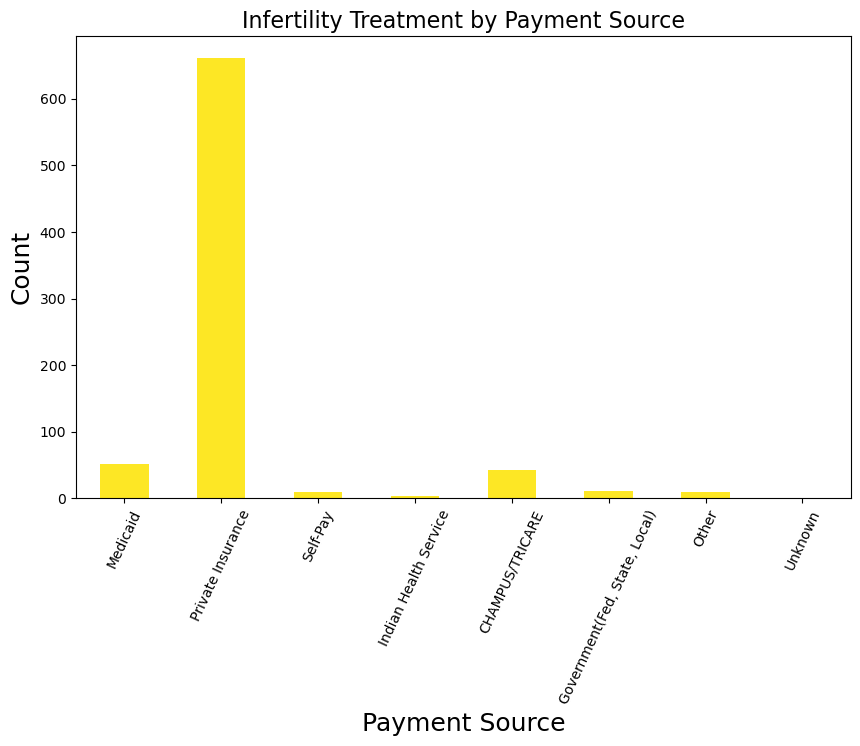

In [10]:
# Bar plot for Infertility Treatment and Payment Source
infertility_payment_counts = jb_clean_births_df.groupby([pay_column, infertility_column]).size().unstack()

# Map numeric codes to labels
infertility_payment_counts.columns = [pay_mapping.get(str(col), col) for col in infertility_payment_counts.columns]

# Plot the bar chart with the appropriate parameters
ax = infertility_payment_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Get the x-axis labels from the index for the coded responses
x_labels = [pay_mapping.get(str(label), label) for label in infertility_payment_counts.index]

# Set x-axis labels manually for presentation
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=65)

# Set plot labels and font sizes
plt.title('Infertility Treatment by Payment Source', fontsize=16)
plt.xlabel('Payment Source', fontsize=18)
plt.ylabel('Count', fontsize=18)

# Hide the legend, as it is useless here.
ax.legend().set_visible(False)

# Show the plot
plt.show()

C:\Users\jarre\AppData\Local\Temp\ipykernel_4416\3371816559.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  drugs_payment_counts = jb_clean_births_df.groupby([pay_column, drug_column]).size().unstack()


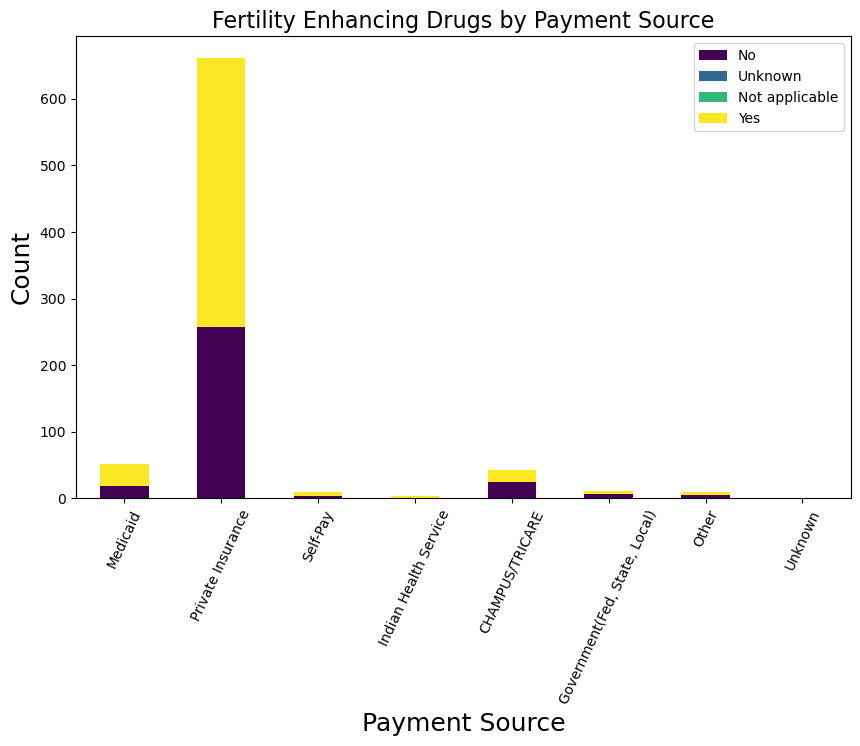

In [11]:
# Bar plot for Fertility Enhancing Drugs and Payment Source with stacking
drugs_payment_counts = jb_clean_births_df.groupby([pay_column, drug_column]).size().unstack()

# Map numeric codes to labels
drugs_payment_counts.columns = [pay_mapping.get(str(col), col) for col in drugs_payment_counts.columns]

# Plot the bar chart with stacking
ax = drugs_payment_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Get the x-axis labels from the index
x_labels = [pay_mapping.get(str(label), label) for label in drugs_payment_counts.index]

# Set x-axis labels manually
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=65)

# Set plot labels and adjust font sizes
plt.title('Fertility Enhancing Drugs by Payment Source', fontsize=16)
plt.xlabel('Payment Source', fontsize=18)
plt.ylabel('Count', fontsize=18)

# Show the plot
plt.show()

C:\Users\jarre\AppData\Local\Temp\ipykernel_4416\1258915186.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  art_payment_counts = jb_clean_births_df.groupby([pay_column, art_column]).size().unstack()


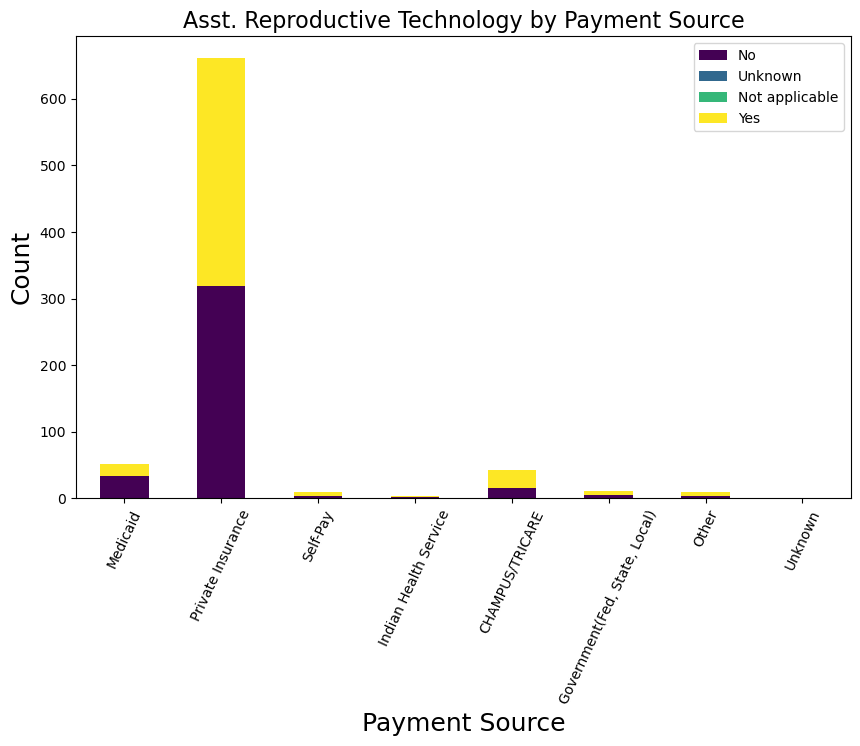

In [12]:
# Bar plot for Asst. Reproductive Technology and Payment Source with stacking
art_payment_counts = jb_clean_births_df.groupby([pay_column, art_column]).size().unstack()

# Map numeric codes to labels
art_payment_counts.columns = [pay_mapping.get(str(col), col) for col in art_payment_counts.columns]

# Plot the bar chart with stacking
ax = art_payment_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Get the x-axis labels from the index
x_labels = [pay_mapping.get(str(label), label) for label in art_payment_counts.index]

# Set x-axis labels manually
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=65)

# Set plot labels and adjust font sizes
plt.title('Asst. Reproductive Technology by Payment Source', fontsize=16)
plt.xlabel('Payment Source', fontsize=18)
plt.ylabel('Count', fontsize=18)

# Show the plot
plt.show()